<a href="https://colab.research.google.com/github/ameliachoi/2019-seoul-apt-eda/blob/master/2019_seoul_apt_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019년 서울 아파트 거래금액 Exploratory Data Analysis
## Jin choi (choijin9561@gmail.com)
### 2020.08.31

## Table of Contents

01. Introduction

02. Data Wrangling
  - 거래금액이 높은 순으로 살펴보기
  - 결측치 처리 Missing Values
  - '주소' 변수 만들기

03. Exploratory Data Analysis : Data Visualization
  - 2019년 서울시 전체 살펴보기
  - 거래금액 기준 상위 10% 살펴보기
  - 거래금액 기준 하위 10% 살펴보기

---

### 1. Introduction

In [ ]:
!pip install plotly
!pip install plotly_express

In [ ]:
# setting
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
mpl.style.use(['ggplot'])

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.2.2
설치 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib


In [ ]:
# 한글 깨짐 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

---

In [ ]:
df = pd.read_csv('https://bit.ly/apt_price_2019_csv', thousands=',', encoding='utf-8')  #thousands : 콤마 제거, int 변환 용이
df.head(3)

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,법정동,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,아파트,월,일,일련번호,전용면적,지번,지역코드,층,시도명,시군구
0,132000,2005,2019,선릉로69길,20.0,0.0,11680.0,1,0.0,4166489.0,역삼동,755,4,11680,10100,1,e-편한세상,1,3,11680-3622,59.606,755-4,11680,14,서울시,강남구
1,61000,2004,2019,테헤란로4길,32.0,0.0,11680.0,1,0.0,4166743.0,역삼동,826,29,11680,10100,1,역삼동우정에쉐르1,1,5,11680-504,59.810,826-29,11680,8,서울시,강남구
2,132000,2005,2019,선릉로69길,20.0,0.0,11680.0,1,0.0,4166489.0,역삼동,755,4,11680,10100,1,e-편한세상,1,11,11680-3622,59.606,755-4,11680,12,서울시,강남구


In [ ]:
df.shape

(42198, 26)

---

### 2. Data Wrangling

#### 거래금액이 높은 순으로 살펴보기
추후 상/하위 가격 순으로 나누어 살펴보기 때문에 내림차순 정렬이 필요합니다.

In [ ]:
df.sort_values(by ='거래금액', ascending=False, inplace=True)
df.head(3)

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,법정동,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,아파트,월,일,일련번호,전용면적,지번,지역코드,층,시도명,시군구
1477,840000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,1,10,11170-2839,244.749,810,11170,3,서울시,용산구
19350,820000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,6,14,11170-2839,244.749,810,11170,3,서울시,용산구
8179,730000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,4,18,11170-2839,243.201,810,11170,1,서울시,용산구


In [ ]:
frame_info = [(col, len(df[col].unique()), df[col].isnull().sum(), df[col].dtype, df[col].unique()[:5]) for col in df.columns]
df_info = pd.DataFrame(frame_info, columns=['name', 'num_of_unique', 'num_of_nan', 'type', 'front5_values'])

In [ ]:
df_info

,name,num_of_unique,num_of_nan,type,front5_values
0,거래금액,2379,0,int64,"[840000, 820000, 730000, 695000, 690000]"
1,건축년도,54,0,int64,"[2011, 2004, 2012, 2019, 2002]"
2,년,1,0,int64,[2019]
3,도로명,2580,33,object,"[독서당로, 영동대로, 서울숲2길, 삼성로, 압구정로71길]"
4,도로명건물본번호코드,613,17,float64,"[111.0, 640.0, 32.0, 636.0, 28.0]"
5,도로명건물부번호코드,60,17,float64,"[0.0, 14.0, 20.0, 16.0, 25.0]"
6,도로명시군구코드,27,17,float64,"[11170.0, 11680.0, 11200.0, 11650.0, 11440.0]"
7,도로명일련번호코드,16,0,int64,"[1, 3, 0, 2, 5]"
8,도로명지상지하코드,2,2038,float64,"[0.0, nan]"
9,도로명코드,2588,17,float64,"[3005014.0, 2122002.0, 4109318.0, 3122005.0, 4..."


해당 데이터에서 `코드`라고 명시되어 있는 feature들은 [대한민국 행정표준관리시스템](https://www.code.go.kr/index.do)의 코드번호입니다. 분석을 위한 최종 데이터셋에서는 `코드` 정보가 필요없기 때문에 따로 처리하지 않습니다.

#### 결측치 처리 Missing Values

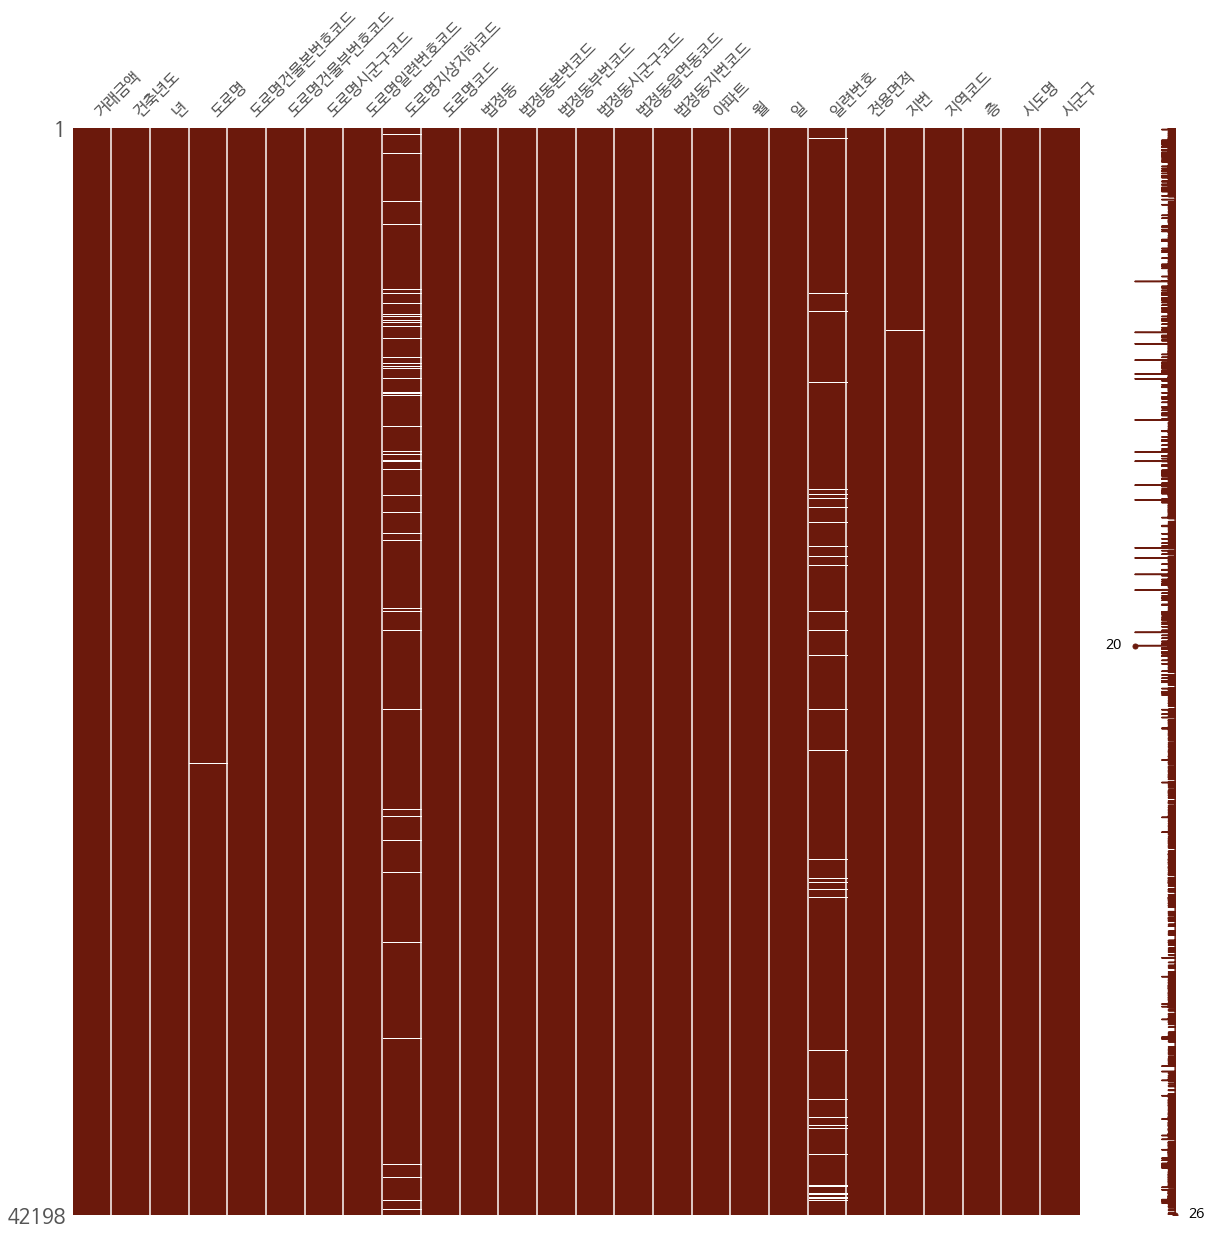

In [ ]:
# Alekse Bilogur의 'Missingno' 패키지 활용하여 결측치 체크
import missingno as msno
msno.matrix(df=df, figsize=(20, 20), color=(0.42, 0.1, 0.05))

`지번`, `도로명` 이외에는 분석에 사용없는 column이기 때문에 따로 결측치 처리를 하지 않습니다. `지번`의 경우 구 주소 정보 구축을 위해 수기로 입력합니다.

In [ ]:
df[df['지번'].isnull()]['아파트'].value_counts()

래미안포레        10
서초포레스타2단지     4
서초 선포레        1
Name: 아파트, dtype: int64

In [ ]:
df[df['아파트'] == '래미안포레'] = df[df['아파트'] == '래미안포레'].replace({'지번': np.nan}, {'지번':'361'}) # 래미안포레 지도 검색시 '자곡동 361'

In [ ]:
df[df['아파트'] == '서초포레스타2단지'] = df[df['아파트'] == '서초포레스타2단지'].replace({'지번': np.nan}, {'지번':'342-7'})

In [ ]:
df[df['아파트'] == '서초 선포레'] = df[df['아파트'] == '서초 선포레'].replace({'지번': np.nan}, {'지번':'271-21'})

#### 새로운 변수 만들기

In [ ]:
# 구주소 만들기
df['지번'] = df['지번'].astype(str)
df['주소'] = df[['시도명', '시군구', '법정동', '지번']].apply(lambda x: ' '.join(x), axis=1)
df['주소'].head()

1477     서울시 용산구  한남동 810
19350    서울시 용산구  한남동 810
8179     서울시 용산구  한남동 810
12525    서울시 용산구  한남동 810
34595    서울시 용산구  한남동 810
Name: 주소, dtype: object

![서울 권역 분류](https://seoulsolution.kr/sites/default/files/images/%EB%8F%84%EC%8B%9C%EC%9E%AC%EC%83%9D_%EA%B6%8C%EC%97%AD%EB%B3%84%EB%B0%9C%EC%A0%84%EB%B0%A9%ED%96%A5.JPG)

[서울정책아카이브](https://seoulsolution.kr/ko/node/4649)에서 서울 권역을 위와 같이 5개로 분류하고 있습니다.

In [ ]:
# 서울시 5개 권으로 나눈 권역명 변수 필요
center = ['종로구', '중구', '용산구']
north_west = ['은평구', '서대문구', '마포구']
north_east = ['도봉구', '노원구', '강북구', '성북구', '동대문구', '중랑구', '성동구', '광진구']
south_west = ['강서구', '양천구', '영등포구', '동작구', '관악구', '구로구', '금천구']
south_east = ['서초구', '강남구', '송파구', '강동구']

df['권역명'] = 0

for i in range(len(df)):
  if df['시군구'][i] in center:
    df['권역명'][i] = '도심권'
  elif df['시군구'][i] in north_west:
    df['권역명'][i] = '서북권'
  elif df['시군구'][i] in north_east:
    df['권역명'][i] = '동북권'
  elif df['시군구'][i] in south_west:
    df['권역명'][i] = '서남권'
  else:
    df['권역명'][i] = '동남권'

df['권역명']

1477     도심권
19350    도심권
8179     도심권
12525    도심권
34595    도심권
        ... 
3755     서남권
10912    서북권
6189     동북권
3881     서남권
36481    서남권
Name: 권역명, Length: 42198, dtype: object

#### 변수명 바꾸기

In [ ]:
df.rename(columns={'아파트':'이름', '시군구':'구이름'}, inplace=True)

In [ ]:
# 우리가 필요한 데이터만 따로 골라보기
df_new = df[['이름', '구이름', '법정동', '권역명', '주소', '건축년도', '거래금액','층', '전용면적']]
df_new.head(30)

,이름,구이름,법정동,권역명,주소,건축년도,거래금액,층,전용면적
1477,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,840000,3,244.749
19350,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,820000,3,244.749
8179,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,730000,1,243.201
12525,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,695000,1,243.201
34595,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,690000,3,240.305
2966,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,660000,2,240.230
5207,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,655000,2,240.230
5203,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,650000,3,240.230
5206,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,645000,1,240.305
12521,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,630000,-1,240.230


In [ ]:
null_result = df_new.isnull().sum().any()
if null_result == False:
  print('결측치 처리 완료!')
if null_result == True:
  print('결측치 처리 다시 하기 :/')

결측치 처리 완료!


In [ ]:
df = df_new.reset_index(drop=True)
df.head()

,이름,구이름,법정동,권역명,주소,건축년도,거래금액,층,전용면적
0,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,840000,3,244.749
1,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,820000,3,244.749
2,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,730000,1,243.201
3,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,695000,1,243.201
4,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,690000,3,240.305


In [ ]:
# sql로 확인하기 위해 csv 파일 만들기
df.to_csv('/content/df_final.csv', sep=',', na_rep='NaN')

---

### 3. Exploratory Data Analysis

#### 2019년 서울시 전체 살펴보기

##### 아파트 전체 거래금액 분포 살펴보기

In [ ]:
df.describe()

,건축년도,거래금액,층,전용면적
count,42198.000000,42198.000000,42198.000000,42198.000000
mean,2000.153183,80170.487488,9.373549,77.546594
std,10.107444,58330.266780,6.252393,31.270181
min,1965.000000,5400.000000,-2.000000,10.780000
25%,1993.000000,42500.000000,5.000000,59.670000
50%,2001.000000,64000.000000,8.000000,82.450000
75%,2007.000000,97000.000000,13.000000,84.970000
max,2019.000000,840000.000000,67.000000,272.740000


In [ ]:
np.percentile(df['거래금액'], [0, 25, 50, 75, 100], interpolation='linear') 

array([  5400.,  42500.,  64000.,  97000., 840000.])

In [ ]:
hist, edges = np.histogram(df['거래금액'], 10)
print(edges) # 분기점 금액
print(hist) # 도수분포

[  5400.  88860. 172320. 255780. 339240. 422700. 506160. 589620. 673080.
 756540. 840000.]
[29664  9530  2278   474   155    75     8     9     3     2]


In [ ]:
x = df['거래금액']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x,
                           marker_color = '#2E64FE',
                           opacity=0.75)
)

fig.update_layout(
    title_text='거래금액 Histogram', # title of plot
    # xaxis_title_text='Value', # xaxis label
    # yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=x,
                     marker_color = '#2E64FE',
                     opacity = 0.75,
                     boxpoints='all'))
fig.update_layout(
    title_text='거래금액 Box plot', # title of plot
    # xaxis_title_text='Value', # xaxis label
    #yaxis_title_text=' ', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

위 `거래금액` 데이터를 볼 때, 최고가는 84억, 최저가는 5400만원, 평균값은 8억원으로 확인 가능합니다.
하지만, 위 결과를 보고 `서울에서 아파트를 사기 위해서는 평균 8억원이 든다`라고 단정지을 수는 없습니다.

`거래금액` histogram 분포를 볼 때 가격의 분포 정도가 고르지 못하고 한 쪽으로 치우쳐있습니다.

box plot으로 자세히 보면, Outlier = Q3 + 1.5 *(Q3 - Q1) = `약 17억 9천만원 이상`의 값들 분포가 상당수를 차지하기 때문에 아파트 간의 `거래금액` 격차가 큰 편이라 볼 수 있습니다.



> 거래금액 기준으로 outlier에 위치한 가격을 따로 분류하여 분석하는 것이 바람직합니다.




##### 거래금액 기준 상/하위 아파트 분류하기

In [ ]:
df_high = df[df['거래금액'] > 178750] # 178,750 outlier 분류하는 최대 상한선
print(df_high.shape)
df_high.tail()

(2703, 9)


,이름,구이름,법정동,권역명,주소,건축년도,거래금액,층,전용면적
2698,개포주공 1단지,강남구,개포동,동남권,서울시 강남구 개포동 141,1982,179000,4,41.980
2699,래미안 옥수 리버젠,성동구,옥수동,동북권,서울시 성동구 옥수동 561,2012,179000,6,134.130
2700,미성2차,강남구,압구정동,동남권,서울시 강남구 압구정동 397,1987,179000,10,74.400
2701,현대슈퍼빌,서초구,서초동,동남권,서울시 서초구 서초동 1446-11,2003,179000,18,153.930
2702,삼성동힐스테이트 1단지,강남구,삼성동,동남권,서울시 강남구 삼성동 16-2,2008,179000,5,84.419


In [ ]:
df_low = df[df['거래금액'] <= 178750]
print(df_low.shape)
df_low.head()

(39495, 9)


,이름,구이름,법정동,권역명,주소,건축년도,거래금액,층,전용면적
2703,파크리오,송파구,신천동,동남권,서울시 송파구 신천동 17,2008,178500,5,144.77
2704,목동신시가지10,양천구,신정동,서남권,서울시 양천구 신정동 311,1987,178500,14,156.24
2705,개포주공 1단지,강남구,개포동,동남권,서울시 강남구 개포동 141,1982,178500,4,42.55
2706,은마,강남구,대치동,동남권,서울시 강남구 대치동 316,1979,178500,4,76.79
2707,우성캐릭터199,강남구,도곡동,동남권,서울시 강남구 도곡동 467-24,1998,178500,13,164.97


In [ ]:
x0 = df_low['거래금액']
x1 = df_high['거래금액']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,
                           marker_color='salmon'))
fig.add_trace(go.Histogram(x=x1,
                           marker_color='forestgreen'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.update_layout(
    title_text='거래금액 상/하위 Histogram', 
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(x=x0,
                     marker_color='salmon',
                     name='기준금액 하위권'))
fig.add_trace(go.Box(x=x1,
                     marker_color='forestgreen',
                     name='기준금액 상위권'))

fig.update_layout(barmode='overlay')
fig.update_layout(
    title_text='거래금액 상/하위 Box plot', 
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()

---

#### 거래금액 기준 하위 아파트 분석

##### 거래 아파트 이름 살펴보기

In [ ]:
# install wordcloud
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [ ]:
# 폰트 추가 설치하기
font_location = '/content/drive/My Drive/Colab Notebooks/2020_seoul_apt_price_2019_visualization/BMDOHYEON_ttf.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [ ]:
wordcloud = WordCloud(font_path=font_location,
                      max_font_size = 50,
                      background_color='white').generate(' '.join(df_low['이름']))
print('Word Cloud created!')

Word Cloud created!


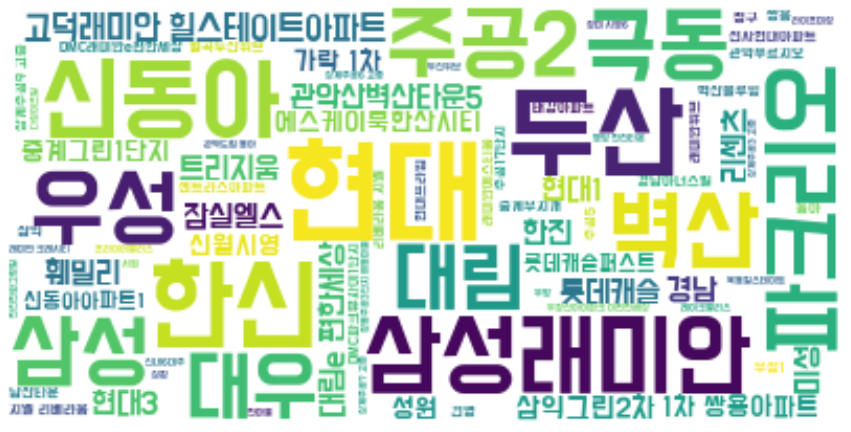

In [ ]:
fig = plt.figure(figsize=(15,20))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word cloud로 만들면 글씨가 많이 깨져서 나옵니다. stylecloud 이용하여 보다 선명하고 직관적으로 아파트 이름을 살펴봅니다.

In [ ]:
!pip install stylecloud

In [ ]:
# 아파트 이름만 txt파일로 빼기
df_low['이름'].to_csv('word_low.txt', index=False, header=None, sep='\t')

In [ ]:
import stylecloud
stylecloud.gen_stylecloud(file_path = '/content/word_low.txt',
                          icon_name='fas fa-home',
                          palette='colorbrewer.sequential.YlOrRd_9',
                          background_color='black',
                          gradient='horizontal',
                          font_path=font_location,
                          output_name='word_low.png')

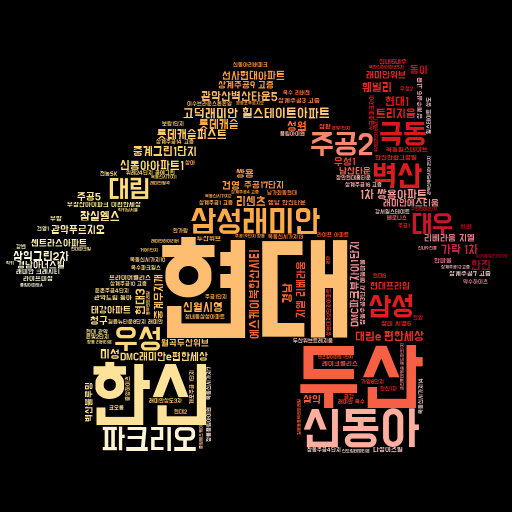

In [ ]:
from IPython.display import Image
Image('/content/word_low.png')

##### 지역구별 아파트 거래건수 분포

In [ ]:
# 구별 데이터 따로 뽑아내기
df_low_gu = df_low['구이름'].value_counts().to_frame().reset_index()
df_low_gu.columns = ['구이름', '거래수']
df_low_gu

,구이름,거래수
0,노원구,4045
1,송파구,2979
2,강동구,2220
3,양천구,2095
4,성북구,2060
5,구로구,2008
6,강서구,1961
7,영등포구,1784
8,도봉구,1716
9,성동구,1710


In [ ]:
labels = df_low_gu['구이름']
values = df_low_gu['거래수']

fig = go.Figure()
fig.add_trace(go.Pie(labels = labels,
                     values = values,
                     hole = .3)
)

fig.update_layout(
    title_text='거래금액 하위 기준 지역구별 분포', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

거래금액 기준 하위권에서 아파트 거래가 가장 많이 있었던 지역구는 `노원구`로 전체에 약 10%를 차지하고 있습니다. 하지만 그 비중이 크다고 할 수는 없고 전체 지역구 전반적으로 분포되어 있는 것을 pie chart를 통해 확인할 수 있습니다. 

상위 5개 구를 따로 분류하여 waffle chart로 나타내봅니다.

In [ ]:
# 상위 5개 구 분류
df_low_gu5 = df_low['구이름'].value_counts().to_frame()[:5]

# total_value 만들기
total = sum(df_low_gu5['구이름'])
category_proportions = [(float(value) / total) for value in df_low_gu5['구이름']] # total value에서 각 value의 비율

# proportion 나누기
for i, proportion in enumerate(category_proportions):
  print (df_low_gu5.index.values[i] + ':' + str(proportion))

노원구:0.30188820061198596
송파구:0.22233002462870363
강동구:0.16568400626912455
양천구:0.15635495186207926
성북구:0.15374281662810657


In [ ]:
# waffle chart 만들기
width = 40
height = 10

total_num_tiles = width * height
print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [ ]:
# waffle chart에서 proportion에 따른 tile 개수 열거
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
  print (df_low_gu5.index.values[i] + ':' + str(tiles))

노원구:121
송파구:89
강동구:66
양천구:63
성북구:61


In [ ]:
# empty matrix 만들기
waffle_chart = np.zeros((height, width))

# index 초기 설정
category_index = 0
tile_index = 0

# waffle chart 생산
for col in range(width):
  for row in range(height):
    tile_index += 1

    if tile_index > sum(tiles_per_category[0:category_index]):
      category_index += 1
    
    waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [ ]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
   

findfont: Font family ['BM DoHyeon'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

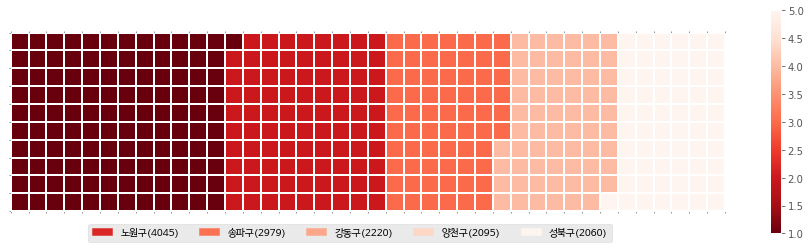

In [ ]:
# visualization
fig = plt.figure()

colormap = plt.cm.Reds_r
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca() # 현재 axes, gcf()는 현재 figure

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_low_gu5['구이름'])
total_values = values_cumsum[len(values_cumsum) - 1]

import matplotlib.patches as mpatches
plt.rc('font', family='NanumBarunGothic') 

# create legend 
legend_handles = []
for i, category in enumerate(df_low_gu5.index.values):
  label_str = category + '(' + str(df_low_gu5['구이름'][i]) + ')'
  color_val = colormap(float(values_cumsum[i]) / total_values)
  legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_low_gu5.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
           )

##### 지역구별 거래금액 비교

In [ ]:
df_low_gu_sum = df_low['거래금액'].groupby(df_low['구이름']).sum()

df_low_gu_sum.to_frame()
df_low_gu_sum = df_low_gu_sum.reset_index(drop=False)
df_low_gu_sum.sort_values(by = '거래금액', ascending=False, inplace=True)
df_low_gu_sum

,구이름,거래금액
17,송파구,318663014
0,강남구,191626582
8,노원구,172828734
18,양천구,164436165
1,강동구,161526556
15,성동구,154594970
14,서초구,144455046
12,마포구,131612080
19,영등포구,121616385
16,성북구,116536603


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df_low_gu_sum['구이름'],
                     y = df_low_gu_sum['거래금액'],
                     marker_color = 'salmon')

)

fig.update_layout(
    title_text='거래금액 하위 기준 지역구별 거래금액 비교', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

지역구별 거래건수는 노원구, 송파구, 강동구, 양천구, 성북구 순서로 많았지만,

지역구별 거래금액은 송파구, 강남구, 노원구, 양천구, 강동구 순서로 나타납니다.

한 그래프에 같이 나타내면 아래와 같습니다.


In [ ]:
df_low_join = pd.merge(df_low_gu, df_low_gu_sum, how='left', on='구이름')
df_low_join

,구이름,거래수,거래금액
0,노원구,4045,172828734
1,송파구,2979,318663014
2,강동구,2220,161526556
3,양천구,2095,164436165
4,성북구,2060,116536603
5,구로구,2008,95659218
6,강서구,1961,111078984
7,영등포구,1784,121616385
8,도봉구,1716,65513372
9,성동구,1710,154594970


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_low_join['구이름'],
                         y=df_low_join['거래수'],
                         mode='lines',
                         name='거래건수',
                         line=dict(color='dimgrey')))
fig.add_trace(go.Scatter(x=df_low_join['구이름'],
                         y=df_low_join['거래금액'].div(100000, fill_value=0),
                         mode='lines+markers',
                         name='거래금액(십만원 단위)',
                         line=dict(color = 'salmon')))
fig.update_layout(
    title_text='거래금액 하위 기준 지역구별 거래건수 / 거래금액 비교', 
    bargap=0.3, 
    bargroupgap=0.1
)

fig.show()

위 그래프를 통해 알 수 있는 사실은, 
1. `노원구`의 경우 거래건수에 비해 거래금액이 상당히 낮은 편에 속합니다. 이러한 현상은 `구로구`나 `도봉구`에서도 확인할 수 있습니다.

2. `송파구`, `강남구`, `서초구`, 강남의 주요 지역구에서는 거래건수에 비해 거래금액이 높습니다. 하위 거래금액 dataset에서 강남권역의 거래 비중이 낮으며, 거래금액이 높게 책정되어 있다는 것을 확인할 수 있습니다.

위 분석결과를 보니 지역구에서도 권역별로 나눠서 보면 위와 같은 insight를 더 확실히 얻을 수 있다고 생각합니다.

##### 서울 권역별 거래건수 / 거래금액 비교

In [ ]:
# 권역별 데이터 따로 뽑아내기
df_low_area = df_low['권역명'].value_counts().to_frame().reset_index()
df_low_area.columns = ['권역명', '거래수']
df_low_area

,권역명,거래수
0,동북권,14153
1,서남권,11496
2,동남권,7984
3,서북권,4324
4,도심권,1538


In [ ]:
df_low_area_sum = df_low['거래금액'].groupby(df_low['권역명']).sum()

df_low_area_sum.to_frame()
df_low_area_sum = df_low_area_sum.reset_index(drop=False)
df_low_area_sum.sort_values(by = '거래금액', ascending=False, inplace=True)
df_low_area_sum

,권역명,거래금액
1,동남권,816271198
2,동북권,777018339
3,서남권,711864707
4,서북권,293528974
0,도심권,132913231


In [ ]:
df_low_join2 = pd.merge(df_low_area, df_low_area_sum
                        , how='left', on='권역명')
df_low_join2

,권역명,거래수,거래금액
0,동북권,14153,777018339
1,서남권,11496,711864707
2,동남권,7984,816271198
3,서북권,4324,293528974
4,도심권,1538,132913231


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(y = df_low_join2['권역명'],
                     x = df_low_join2['거래수'],
                     name='거래건수',
                     marker_color = 'dimgrey',
                     orientation='h')
)

fig.add_trace(go.Bar(y = df_low_join2['권역명'],
                     x = df_low_join2['거래금액'].div(100000, fill_value=0),
                     name='거래금액(십만원 단위)',
                     marker_color = 'salmon',
                     orientation='h')
)

fig.update_layout(
    title_text='거래금액 하위 기준 권역별 거래건수 / 거래금액 비교', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

권역으로 분류를 해보았을 때도, `서초구`, `강남구`, `강동구`, `송파구`가 위치한 `동남권`역만이 거래건수 대비 거래금액이 높은 것으로 나타납니다.

##### 건축년도 기준 권역별 총 거래금액 비교

In [ ]:
# 건축년도 기준 dataset을 만듭니다
df_low_year = df_low[['구이름', '권역명', '건축년도', '거래금액']]
df_low_year

,구이름,권역명,건축년도,거래금액
2703,송파구,동남권,2008,178500
2704,양천구,서남권,1987,178500
2705,강남구,동남권,1982,178500
2706,강남구,동남권,1979,178500
2707,강남구,동남권,1998,178500
...,...,...,...,...
42193,구로구,서남권,1996,7000
42194,서대문구,서북권,1978,7000
42195,광진구,동북권,1999,6900
42196,금천구,서남권,1975,6500


In [ ]:
df_low_year_gu = df_low_year.groupby(['권역명', '건축년도'])['거래금액'].sum()
df_low_year_gu.to_frame()
df_low_year_gu = df_low_year_gu.reset_index(drop=False)
df_low_year_gu.sort_values(by = '거래금액', ascending=False, inplace=True)
df_low_year_gu

,권역명,건축년도,거래금액
81,동남권,2008,94941649
170,서남권,2003,52092400
61,동남권,1988,49963720
171,서남권,2004,48002068
122,동북권,2003,45855570
...,...,...,...
0,도심권,1965,44500
93,동북권,1969,36300
196,서북권,1978,32200
95,동북권,1972,20600


In [ ]:
# 전체 그래프 살펴보기
fig = go.Figure()
fig = px.scatter(df_low_year_gu, x="건축년도", y="거래금액",
                 color="권역명", size = '거래금액',
                 log_x=True, size_max=60)

fig.update_layout(
    title_text='건축년도 기준 권역별 총 거래금액 비교', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

##### 층수와 거래금액 상관관계 확인하기

In [ ]:
df_low_floor = df_low.groupby('층')['거래금액'].mean().to_frame()
df_low_floor = df_low_floor.reset_index(drop=False)
df_low_floor.sort_values(by = '거래금액', ascending=False, inplace=True)
df_low_floor

,층,거래금액
51,65,175000.000000
45,44,173000.000000
0,-2,151000.000000
49,48,148000.000000
50,49,144500.000000
41,40,138383.333333
40,39,137750.000000
38,37,137062.500000
36,35,136467.058824
46,45,135000.000000


In [ ]:
fig = px.scatter(df_low_floor, x = '층', y='거래금액')

fig.update_layout(
    title_text='층수와 평균 거래금액 상관관계', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

**층수와 거래금액 간에는 양의 상관관계가 존재한다.**
즉, 층수가 높을 수록 가격이 높은 경향이 있다.

In [ ]:
# 지하 2층 값이 너무 높다...?
df_low[df_low['층'] == -2]

,이름,구이름,법정동,권역명,주소,건축년도,거래금액,층,전용면적
4426,옥수파크힐스,성동구,옥수동,동북권,서울시 성동구 옥수동 528,2016,151000,-2,76.66


지하 2층 매물은 하나 밖에 없어서 평균 값이 원래 값이므로 기준에서 제외하는 것이 낫다고 판단합니다.

In [ ]:
# 50 이후로 카운팅이 없다가 65층 하나만 등장
df_low[df_low['층'] == 65]

,이름,구이름,법정동,권역명,주소,건축년도,거래금액,층,전용면적
2867,현대하이페리온,양천구,목동,서남권,서울시 양천구 목동 916,2003,175000,65,138.2


위와 같이, 지하 2층 매물처럼 단독 건이라 제외시킵니다.

층수와 거래 금액 도수 분포를 나타내는 등고선 그래프는 다음과 같습니다.

In [ ]:
# 층수와 거래금액 도수분포 등고선 그래프
fig = go.Figure(go.Histogram2dContour(
        x = df_low_floor['층'],
        y = df_low_floor['거래금액'],
        colorscale = 'sunset'
))
fig.show()

막대 그래프에서 확인할 수 있듯이 층수가 높아질 수록 금액이 상승하는 경향이 있습니다. 매물의 경우 약 9~10층이 가장 많은 수가 분포한 것을 확인할 수 있습니다.

##### 전용면적과 거래금액 상관관계 확인하기

In [ ]:
df_low_sqrt = df_low.groupby('전용면적')['거래금액'].mean().to_frame()
df_low_sqrt = df_low_sqrt.reset_index(drop=False)
df_low_sqrt.sort_values(by = '거래금액', ascending=False, inplace=True)
df_low_sqrt

,전용면적,거래금액
3694,96.7200,178500.0
4877,136.3800,178500.0
4553,122.4600,178000.0
5127,155.2314,178000.0
4888,137.0360,178000.0
...,...,...
154,15.1800,7700.0
320,21.9000,7520.0
733,41.3500,7000.0
613,36.7600,7000.0


In [ ]:
df_low_sqrt

,전용면적,거래금액
3694,96.7200,178500.0
4877,136.3800,178500.0
4553,122.4600,178000.0
5127,155.2314,178000.0
4888,137.0360,178000.0
...,...,...
154,15.1800,7700.0
320,21.9000,7520.0
733,41.3500,7000.0
613,36.7600,7000.0


In [ ]:
fig = px.scatter(df_low_sqrt, x="전용면적", y="거래금액")

fig.update_layout(
    title_text='전용면적과 평균 거래금액 상관관계', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

**전용면적과 거래금액 간에는 양의 상관관계가 존재한다.**
전용면적이 넓을 수록 금액이 높은 경향이 있다.

In [ ]:
# 전용면적과 거래금액 도수분포 등고선 그래프
fig = go.Figure(go.Histogram2dContour(
        x = df_low_sqrt['전용면적'],
        y = df_low_sqrt['거래금액'],
        colorscale = 'sunset'
))
fig.show()

전용면적과 거래금액 간의 도수분포 등고선 그래프를 확인해본 결과, 15평 매물이 가장 많은 것을 확인할 수 있다.

*보통 15평 아파트의 경우, 신혼부부 매물인 경우가 가장 많다.*

#### 거래금액 기준 상위 아파트 분석

##### 거래 아파트 이름 살펴보기

In [ ]:
wordcloud = WordCloud(font_path=font_location,
                      max_font_size = 50,
                      background_color='white').generate(' '.join(df_high['이름']))
print('Word Cloud created!')

Word Cloud created!


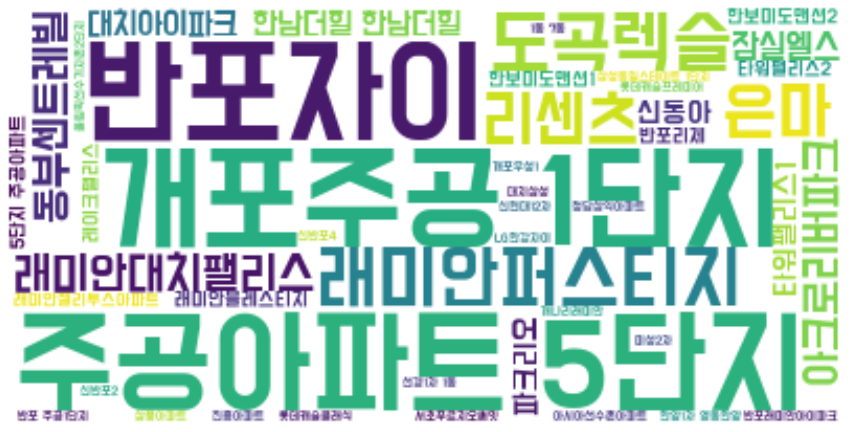

In [ ]:
fig = plt.figure(figsize=(15,20))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 아파트 이름만 txt파일로 빼기
df_high['이름'].to_csv('word_high.txt', index=False, header=None, sep='\t')

In [ ]:
import stylecloud
stylecloud.gen_stylecloud(file_path = '/content/word_high.txt',
                          icon_name='fas fa-home',
                          palette='colorbrewer.sequential.YlOrRd_9',
                          background_color='black',
                          gradient='horizontal',
                          font_path=font_location,
                          output_name='word_high.png')

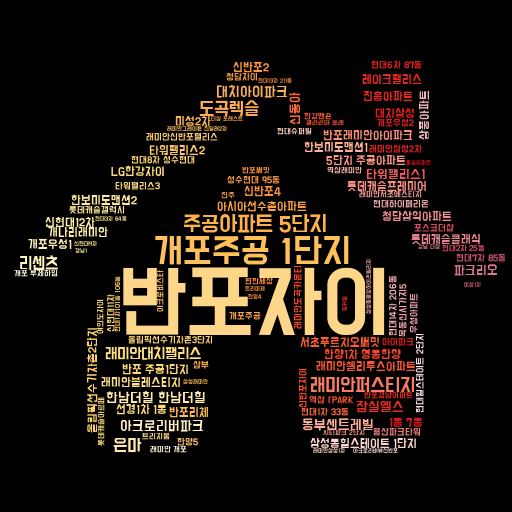

In [ ]:
from IPython.display import Image
Image('/content/word_high.png')

##### 지역구별 아파트 거래건수 분포

In [ ]:
# 구별 데이터 따로 뽑아내기
df_high_gu = df_high['구이름'].value_counts().to_frame().reset_index()
df_high_gu.columns = ['구이름', '거래수']
df_high_gu

,구이름,거래수
0,강남구,1299
1,서초구,661
2,송파구,367
3,용산구,212
4,양천구,55
5,영등포구,48
6,성동구,25
7,마포구,14
8,광진구,12
9,종로구,6


In [ ]:
labels = df_high_gu['구이름']
values = df_high_gu['거래수']

fig = go.Figure()
fig.add_trace(go.Pie(labels = labels,
                     values = values,
                     hole = .3)
)

fig.update_layout(
    title_text='거래금액 상위 기준 지역구별 분포', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

거래금액 기준 상위권에서 아파트 거래가 가장 많이 있었던 지역구는 `강남구`로 전체에 약 48%, 절반 가까이를 차지하고 있습니다.

상위 5개 구를 따로 분류하여 waffle chart로 나타내봅니다.

In [ ]:
# 상위 5개 구 분류
df_high_gu5 = df_high['구이름'].value_counts().to_frame()[:5]

# total_value 만들기
total = sum(df_high_gu5['구이름'])
category_proportions = [(float(value) / total) for value in df_high_gu5['구이름']] # total value에서 각 value의 비율

# proportion 나누기
for i, proportion in enumerate(category_proportions):
  print (df_high_gu5.index.values[i] + ':' + str(proportion))

강남구:0.5007710100231303
서초구:0.25481881264456435
송파구:0.14148033924441017
용산구:0.08172706245181187
양천구:0.02120277563608327


In [ ]:
# waffle chart 만들기
width = 40
height = 10

total_num_tiles = width * height
print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [ ]:
# waffle chart에서 proportion에 따른 tile 개수 열거
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
  print (df_high_gu5.index.values[i] + ':' + str(tiles))

강남구:200
서초구:102
송파구:57
용산구:33
양천구:8


In [ ]:
# empty matrix 만들기
waffle_chart = np.zeros((height, width))

# index 초기 설정
category_index = 0
tile_index = 0

# waffle chart 생산
for col in range(width):
  for row in range(height):
    tile_index += 1

    if tile_index > sum(tiles_per_category[0:category_index]):
      category_index += 1
    
    waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [ ]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
        3., 3., 3., 3., 4., 4., 4., 4.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
        3., 3., 3., 3., 4., 4., 4., 4.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        3., 3., 3., 3., 4., 4., 4., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        3., 3., 3., 3., 4., 4., 4., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        3., 3., 3., 3., 4., 4., 4., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
   

<Figure size 432x288 with 0 Axes>

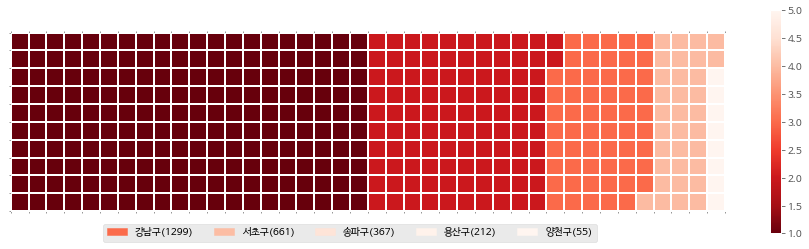

In [ ]:
# visualization
fig = plt.figure()

colormap = plt.cm.Reds_r
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca() # 현재 axes, gcf()는 현재 figure

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_high_gu5['구이름'])
total_values = values_cumsum[len(values_cumsum) - 1]

import matplotlib.patches as mpatches
plt.rc('font', family='NanumBarunGothic') 

# create legend 
legend_handles = []
for i, category in enumerate(df_high_gu5.index.values):
  label_str = category + '(' + str(df_high_gu5['구이름'][i]) + ')'
  color_val = colormap(float(values_cumsum[i]) / total_values)
  legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_high_gu5.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
           )

##### 지역구별 거래금액 비교

In [ ]:
df_high_gu_sum = df_high['거래금액'].groupby(df_high['구이름']).sum()

df_high_gu_sum.to_frame()
df_high_gu_sum = df_high_gu_sum.reset_index(drop=False)
df_high_gu_sum.sort_values(by = '거래금액', ascending=False, inplace=True)
df_high_gu_sum

,구이름,거래금액
0,강남구,313168439
5,서초구,163193180
7,송파구,73625110
10,용산구,66096553
8,양천구,10829300
9,영등포구,9724700
6,성동구,7548500
4,마포구,2819500
2,광진구,2371000
11,종로구,1249500


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df_high_gu_sum['구이름'],
                     y = df_high_gu_sum['거래금액'],
                     marker_color = 'salmon')

)

fig.update_layout(
    title_text='거래금액 상위 기준 지역구별 거래금액 비교', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

지역구별 거래건수와 거래금액은 동일하게 강남구, 서초구, 송파구, 용산구, 양천구 순으로 나타납니다. 하위 건수와 차이점은 일부 구 데이터가 아예 없습니다. 즉, 일부 하위 지역구는 거래금액 기준 상위 아파트가 아예 없습니다.

한 그래프에 같이 나타내면 아래와 같습니다.


In [ ]:
df_high_join = pd.merge(df_high_gu, df_high_gu_sum, how='left', on='구이름')
df_high_join

,구이름,거래수,거래금액
0,강남구,1299,313168439
1,서초구,661,163193180
2,송파구,367,73625110
3,용산구,212,66096553
4,양천구,55,10829300
5,영등포구,48,9724700
6,성동구,25,7548500
7,마포구,14,2819500
8,광진구,12,2371000
9,종로구,6,1249500


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_high_join['구이름'],
                         y=df_high_join['거래수'],
                         mode='lines',
                         name='거래건수',
                         line=dict(color='dimgrey')))
fig.add_trace(go.Scatter(x=df_high_join['구이름'],
                         y=df_high_join['거래금액'].div(100000, fill_value=0),
                         mode='lines+markers',
                         name='거래금액(십만원 단위)',
                         line=dict(color = 'salmon')))
fig.update_layout(
    title_text='거래금액 상위 기준 지역구별 거래건수 / 거래금액 비교', 
    bargap=0.3, 
    bargroupgap=0.1
)

fig.show()

위 그래프를 통해 알 수 있는 사실은, 
1. 거래금액 기준 상위 아파트들은 거래건수와 거래금액이 비례합니다.

2. 압도적으로 `강남구`에 상위권 아파트 분포가 높습니다. 

지역구에서도 권역별로 나눠서 살펴봅니다.

##### 서울 권역별 거래건수 / 거래금액 비교

In [ ]:
# 권역별 데이터 따로 뽑아내기
df_high_area = df_high['권역명'].value_counts().to_frame().reset_index()
df_high_area.columns = ['권역명', '거래수']
df_high_area

,권역명,거래수
0,동남권,2330
1,도심권,218
2,서남권,104
3,동북권,37
4,서북권,14


In [ ]:
df_high_area_sum = df_high['거래금액'].groupby(df_high['권역명']).sum()

df_high_area_sum.to_frame()
df_high_area_sum = df_high_area_sum.reset_index(drop=False)
df_high_area_sum.sort_values(by = '거래금액', ascending=False, inplace=True)
df_high_area_sum

,권역명,거래금액
1,동남권,550533729
0,도심권,67346053
3,서남권,20819000
2,동북권,9919500
4,서북권,2819500


In [ ]:
df_high_join2 = pd.merge(df_high_area, df_high_area_sum
                        , how='left', on='권역명')
df_high_join2

,권역명,거래수,거래금액
0,동남권,2330,550533729
1,도심권,218,67346053
2,서남권,104,20819000
3,동북권,37,9919500
4,서북권,14,2819500


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(y = df_high_join2['권역명'],
                     x = df_high_join2['거래수'],
                     name='거래건수',
                     marker_color = 'dimgrey',
                     orientation='h')
)

fig.add_trace(go.Bar(y = df_high_join2['권역명'],
                     x = df_high_join2['거래금액'].div(100000, fill_value=0),
                     name='거래금액(십만원 단위)',
                     marker_color = 'salmon',
                     orientation='h')
)

fig.update_layout(
    title_text='거래금액 상위 기준 권역별 거래건수 / 거래금액 비교', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

권역으로 분류를 해보았을 때도, `서초구`, `강남구`, `강동구`, `송파구`가 위치한 `동남권`역만이 거래건수 대비 거래금액이 2배 이상 높습니다. 

동부권과 서부권의 격차가 상당한 것으로 나타납니다.

##### 건축년도 기준 권역별 총 거래금액 비교

In [ ]:
# 건축년도 기준 dataset을 만듭니다
df_high_year = df_high[['구이름', '권역명', '건축년도', '거래금액']]
df_high_year

,구이름,권역명,건축년도,거래금액
0,용산구,도심권,2011,840000
1,용산구,도심권,2011,820000
2,용산구,도심권,2011,730000
3,용산구,도심권,2011,695000
4,용산구,도심권,2011,690000
...,...,...,...,...
2698,강남구,동남권,1982,179000
2699,성동구,동북권,2012,179000
2700,강남구,동남권,1987,179000
2701,서초구,동남권,2003,179000


In [ ]:
df_high_year_gu = df_high_year.groupby(['권역명', '건축년도'])['거래금액'].sum()
df_high_year_gu.to_frame()
df_high_year_gu = df_high_year_gu.reset_index(drop=False)
df_high_year_gu.sort_values(by = '거래금액', ascending=False, inplace=True)
df_high_year_gu

,권역명,건축년도,거래금액
54,동남권,2009,53630450
53,동남권,2008,44676670
51,동남권,2006,36740400
23,동남권,1978,35292270
14,도심권,2011,33372500
...,...,...,...
86,서북권,2009,194000
82,서남권,2005,188000
35,동남권,1990,185000
13,도심권,2010,180000


In [ ]:
# 전체 그래프 살펴보기
fig = go.Figure()
fig = px.scatter(df_high_year_gu, x="건축년도", y="거래금액",
                 color="권역명", size = '거래금액',
                 log_x=True, size_max=60)

fig.update_layout(
    title_text='건축년도 기준 권역별 총 거래금액 비교 (상위권)', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

##### 층수와 거래금액 상관관계 확인하기

In [ ]:
df_high_floor = df_high.groupby('층')['거래금액'].mean().to_frame()
df_high_floor = df_high_floor.reset_index(drop=False)
df_high_floor.sort_values(by = '거래금액', ascending=False, inplace=True)
df_high_floor

,층,거래금액
0,-2,630000.000000
1,-1,630000.000000
58,61,345000.000000
59,62,340000.000000
56,56,315000.000000
...,...,...
30,29,224575.000000
44,43,222500.000000
33,32,217699.800000
50,50,217666.666667


In [ ]:
fig = px.scatter(df_high_floor, x = '층', y='거래금액')

fig.update_layout(
    title_text='층수와 평균 거래금액 상관관계 (상위권)', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

**층수와 거래금액 간에 상관관계가 없다고 볼 수 있습니다.**

In [ ]:
# 지하 1, 2층 값이 너무 높다...?
df_high[(df_high['층'] == -1) | (df_high['층'] == -2)]

,이름,구이름,법정동,권역명,주소,건축년도,거래금액,층,전용면적
9,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,630000,-1,240.23
10,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,630000,-2,240.23
12,한남더힐,용산구,한남동,도심권,서울시 용산구 한남동 810,2011,630000,-1,240.23


지하 매물은 극 소수 건 밖에 없어서 평균 값이 원래 값이므로 기준에서 제외하는 것이 낫다고 판단합니다.

층수와 거래 금액 도수 분포를 나타내는 등고선 그래프는 다음과 같습니다.

In [ ]:
# 층수와 거래금액 도수분포 등고선 그래프
fig = go.Figure(go.Histogram2dContour(
        x = df_high_floor['층'],
        y = df_high_floor['거래금액'],
        colorscale = 'sunset'
))
fig.show()

분포가 거의 정규분포와 유사하게 균등히 분포되어 있습니다. 29~30층 매물이 가장 많습니다.

##### 전용면적과 거래금액 상관관계 확인하기

In [ ]:
df_high_sqrt = df_high.groupby('전용면적')['거래금액'].mean().to_frame()
df_high_sqrt = df_high_sqrt.reset_index(drop=False)
df_high_sqrt.sort_values(by = '거래금액', ascending=False, inplace=True)
df_high_sqrt

,전용면적,거래금액
797,244.749,830000.000000
783,243.201,712500.000000
775,240.305,667500.000000
774,240.230,640714.285714
772,237.740,533000.000000
...,...,...
358,129.160,179000.000000
528,153.930,179000.000000
342,125.750,179000.000000
181,102.480,179000.000000


In [ ]:
fig = px.scatter(df_high_sqrt, x="전용면적", y="거래금액")

fig.update_layout(
    title_text='전용면적과 평균 거래금액 상관관계 (상위권)', 
    bargap=0.2, 
    bargroupgap=0.1
)

fig.show()

**전용면적과 거래금액 간에는 양의 상관관계가 존재한다.**
전용면적이 넓을 수록 금액이 높은 경향이 있다.

In [ ]:
# 전용면적과 거래금액 도수분포 등고선 그래프
fig = go.Figure(go.Histogram2dContour(
        x = df_high_sqrt['전용면적'],
        y = df_high_sqrt['거래금액'],
        colorscale = 'sunset'
))
fig.show()

전용면적과 거래금액 간의 도수분포 등고선 그래프를 확인해본 결과, 110평 매물이 가장 많은 것을 확인할 수 있다.

*100~110평 아파트의 경우, 테라스나 정원 시설이 포함되어 있고 방 개수는 최소 4개 이상으로 추정한다 (...)*